# **Twitter Sentimental Analysis**

In [ ]:
! pip install --user scipy wordcloud nltk seaborn textblob

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import json, nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
%matplotlib inline
from sklearn import metrics

**Importing Dataset**

In [ ]:
total_data = pd.read_csv('/content/tweets.csv',encoding='latin-1')

In [ ]:

with open('/content/contractions.json', 'r') as f:
    contractions_dict = json.load(f)
contractions = contractions_dict['contractions']

In [ ]:
total_data.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [ ]:
tweet = total_data.columns.values[2]
sentiment = total_data.columns.values[1]
tweet, sentiment

('SentimentText', 'Sentiment')

In [ ]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ItemID         9999 non-null   int64 
 1   Sentiment      9999 non-null   int64 
 2   SentimentText  9999 non-null   object
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


**Data Cleaning**

In [ ]:
import re

def process_tweet(tweet):
    tweet = tweet.lower()                                             
    tweet = re.sub('@[^\s]+', '', tweet)                             
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', tweet)   
    tweet = re.sub(r"\d+", " ", str(tweet))                          
    tweet = re.sub('&quot;'," ", tweet)                                 
    tweet = re.sub(r"\b[a-zA-Z]\b", "", str(tweet))                                           
    for word in tweet.split():
        if word.lower() in contractions:
            tweet = tweet.replace(word, contractions[word.lower()])  
    tweet = re.sub(r"[^\w\s]", " ", str(tweet))                      
    tweet = re.sub(r'(.)\1+', r'\1\1', tweet)                         
    tweet = re.sub(r"\s+", " ", str(tweet))                               
    return tweet

In [ ]:
total_data['processed_tweet'] = np.vectorize(process_tweet)(total_data[tweet])

In [ ]:
total_data.head(10)

,ItemID,Sentiment,SentimentText,processed_tweet
0,1,0,is so sad for my APL frie...,is so sad for my apl friend
1,2,0,I missed the New Moon trail...,missed the new moon trailer
2,3,1,omg its already 7:30 :O,omg its already
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga im soo im gunna cry ve been at this de...
4,5,0,i think mi bf is cheating on me!!! ...,think mi bf is cheating on me t_t
5,6,0,or i just worry too much?,or just worry too much
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!,juusst chillin
7,8,0,Sunny Again Work Tomorrow :-| ...,sunny again work tomorrow tv tonight
8,9,1,handed in my uniform today . i miss you ...,handed in my uniform today miss you already
9,10,1,hmmmm.... i wonder how she my number @-),hmm wonder how she my number


**Data visualization**

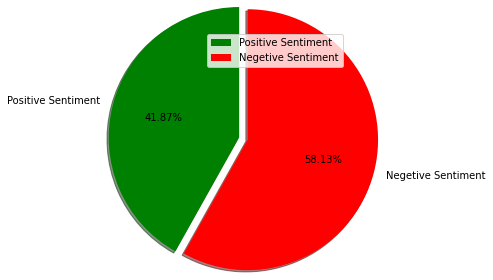

In [ ]:
sentiments = ['Positive Sentiment', 'Negetive Sentiment'] 
slices = [(total_data[sentiment] != 0).sum(), (total_data[sentiment] == 0).sum()] 
colors = ['g', 'r'] 
plt.pie(slices, labels = sentiments, colors=colors, startangle=90, shadow = True,
        explode = (0, 0.1), radius = 1.5, autopct = '%1.2f%%') 
plt.legend()
plt.show()

<Figure size 3600x2400 with 0 Axes>

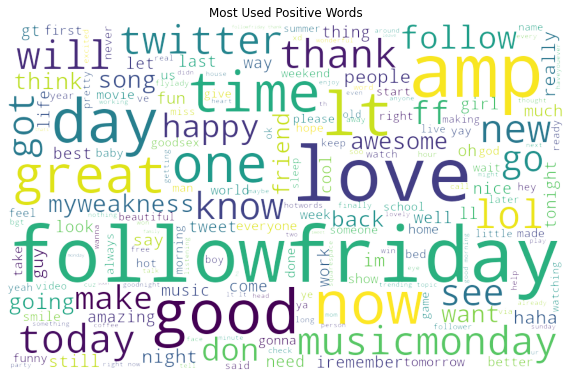

In [ ]:
positive_words =' '.join([text for text in total_data['processed_tweet'][total_data[sentiment] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21,
            max_font_size=110,background_color="rgba(255, 255, 255, 0)"
            , mode="RGBA").generate(positive_words)
plt.figure(dpi=600)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Used Positive Words")
plt.savefig('/content/positivewords.jpg')
plt.show()

<Figure size 3600x2400 with 0 Axes>

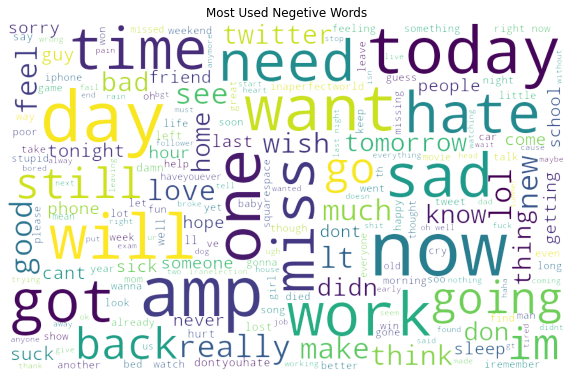

In [ ]:
negetive_words =' '.join([text for text in total_data['processed_tweet'][total_data[sentiment] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, 
            max_font_size=110,background_color="rgba(255, 255, 255, 0)"
            , mode="RGBA").generate(negetive_words)
plt.figure(dpi=600)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Used Negetive Words")
plt.savefig('/content/negetivewords.jpg')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(ngram_range=(1,2))    # Unigram and Bigram
final_vectorized_data = count_vectorizer.fit_transform(total_data['processed_tweet'])  
final_vectorized_data

<9999x80219 sparse matrix of type '<class 'numpy.int64'>'
	with 206290 stored elements in Compressed Sparse Row format>

In [ ]:
#data splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_vectorized_data, total_data[sentiment],
                                                    test_size=0.2, random_state=69)

In [ ]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (7999, 80219)
X_test_shape :  (2000, 80219)
y_train_shape :  (7999,)
y_test_shape :  (2000,)


**Decision tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
dt_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, dt_pred)*100,"%")

Accuracy: 69.65 %


**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

rf_pred=clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, rf_pred)*100,"%")

Accuracy: 73.9 %


**SVM Classifier**

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
svm_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, svm_pred)*100,"%")

Accuracy: 76.3 %


**Naive Bayes Classifier**

In [ ]:
 # Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB 

# fit the model with data
model_naive = MultinomialNB().fit(X_train, y_train) 

#Predict the response for test dataset
nb_pred = model_naive.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, nb_pred)*100,"%")

Accuracy: 76.4 %


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#Predict the response for test dataset
lr_pred=logreg.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, lr_pred)*100,"%")

Accuracy: 77.4 %


Text(0.5, 15.0, 'Predicted label')

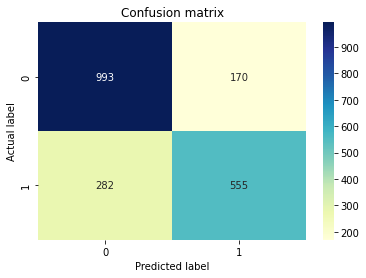

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lr_pred)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')